In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/biv hack/for-teams/payments_training.tsv'  # Update with the actual path if needed
data = pd.read_csv(file_path, sep='\t', header=None, names=['ID', 'Date', 'Price', 'Purpose', 'Category'])

# Data Cleaning and Preprocessing
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Clean and standardize Price column
data['Price'] = data['Price'].replace({',': '.', '-': '.'}, regex=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Price'] = data['Price'].apply(lambda x: float(x))

# Remove rows with invalid or missing prices
data = data.dropna(subset=['Price'])

# Display basic information about the dataset
eda_info = {
    "Basic Info": data.info(),
    "Head of Dataset": data.head(),
    "Summary Statistics": data.describe(include='all'),
    "Missing Values": data.isnull().sum()
}

# Grouping by category for analysis
category_summary = data.groupby('Category')['Price'].agg(['count', 'mean', 'sum']).reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        500 non-null    int64         
 1   Date      500 non-null    datetime64[ns]
 2   Price     500 non-null    float64       
 3   Purpose   500 non-null    object        
 4   Category  500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.7+ KB


In [4]:
data.head()

,ID,Date,Price,Purpose,Category
0,1,2024-11-07,15300.0,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,2024-11-07,40200.0,За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,2024-11-07,1440.0,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,2024-11-07,240000000.0,Возврат денежных средств по договору займа №04...,LOAN
4,5,2024-11-07,1360000.0,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED


In [5]:
max(data.Purpose.apply(lambda x: len(x)))

151

In [ ]:
category_summary

,Category,count,mean,sum
0,BANK_SERVICE,49,2.596363e+05,1.272218e+07
1,FOOD_GOODS,90,4.570096e+05,4.113086e+07
2,LEASING,38,1.947672e+06,7.401154e+07
3,LOAN,41,7.926390e+07,3.249820e+09
4,NON_FOOD_GOODS,96,7.755631e+05,7.445406e+07
5,NOT_CLASSIFIED,23,1.216073e+06,2.796968e+07
6,REALE_STATE,27,4.051346e+07,1.093863e+09
7,SERVICE,88,8.211091e+04,7.225760e+06
8,TAX,48,6.528125e+03,3.133500e+05


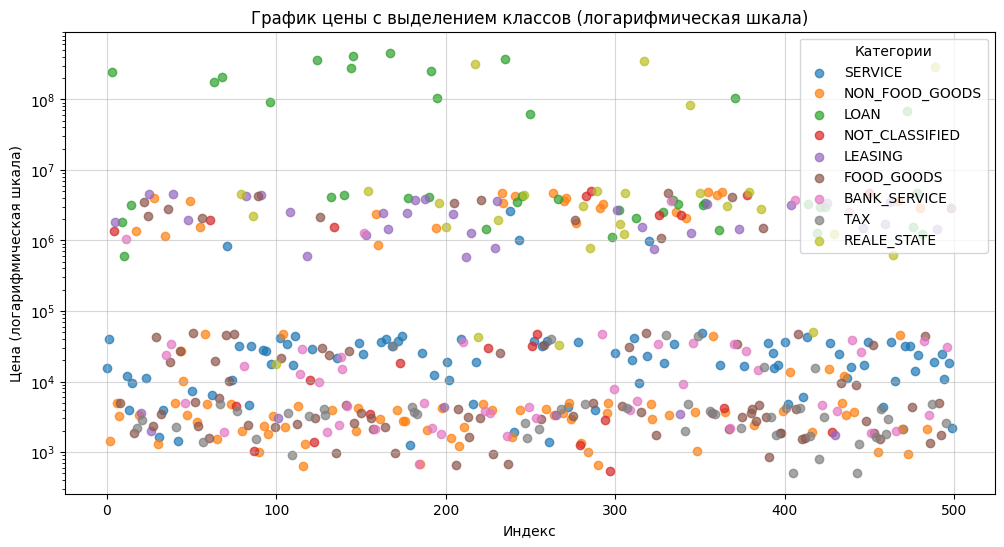

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Группируем данные по категориям
categories = data['Category'].unique()

plt.figure(figsize=(12, 6))

# Рисуем точки для каждой категории
for category in categories:
    subset = data[data['Category'] == category]
    plt.scatter(subset.index, subset['Price'], label=category, alpha=0.7)

# Настраиваем логарифмическую шкалу на оси Y
plt.yscale('log')
plt.title('График цены с выделением классов (логарифмическая шкала)')
plt.xlabel('Индекс')
plt.ylabel('Цена (логарифмическая шкала)')
plt.legend(title='Категории')
plt.grid(alpha=0.5)
plt.show()


In [ ]:
unique_prices = data['Price'].value_counts().reset_index()
unique_prices.columns = ['Price', 'Count']
len(unique_prices)

427

In [ ]:
sorted(data['Price'])[:10]

[510.0, 510.0, 540.0, 630.0, 660.0, 660.0, 680.0, 680.0, 680.0, 800.0]